# Import libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'

# Step 1 : Import the data and save it in dataframe 

In [171]:
df=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [206]:
df.shape

(16715, 11)

# Step 2 : Data preparation

## replace columns name

In [172]:
#Replace the column names (make them lowercase)

df.columns=df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## convert datatypes

In [173]:
#Convert the data to the required types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object



we need to change the types for most of the collumns as following :


- names -> string

- platform , genre , rating - > category

- year - > data

now about the [user_score] the type is float but it has some tbd values as string 
so we need to replace the tpd values with nan values so that we do not need to delete the records 


- user score -> float

In [177]:
#convert the name colum into string
df['name']=df.name.astype('str')

#convert both [platform],[rating] and [genre]  to catagories
df['platform']=df.platform.astype('category')
df['genre']=df.genre.astype('category')
df['rating']=df.rating.astype('category')

#convert the year of release to data type

df['year_of_release']=pd.to_datetime(df.year_of_release, format='%Y')


#replace tbd with nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

#convert user_score to float 
df['user_score']=df.user_score.astype(float)


df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [178]:
df.dtypes

name                       object
platform                 category
year_of_release    datetime64[ns]
genre                    category
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                   category
dtype: object

## dealing with missing values

### ploting missinv valuse propotion

<Figure size 720x432 with 0 Axes>

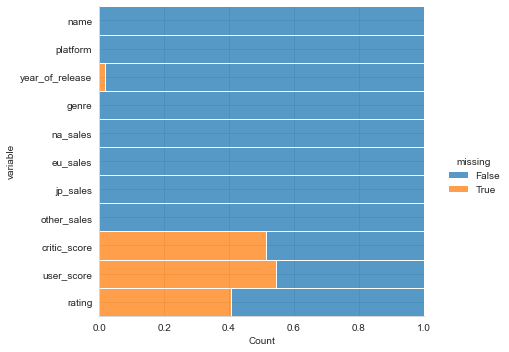

In [209]:

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

- from the up graph we can see the we have 4 columns have missing values
- both critic score and user_score and rating have high missing values propotion that we need to deal with 


whe have multipe methods to deal with type of proplems( missing values)
- delete records 
- replace the missing values with the most frequent cat in the catagorical columns
- replace misshing values with the avarage or the median based on the distribution numrical values

## visualize the catagorical values 

<AxesSubplot:xlabel='platform', ylabel='count'>

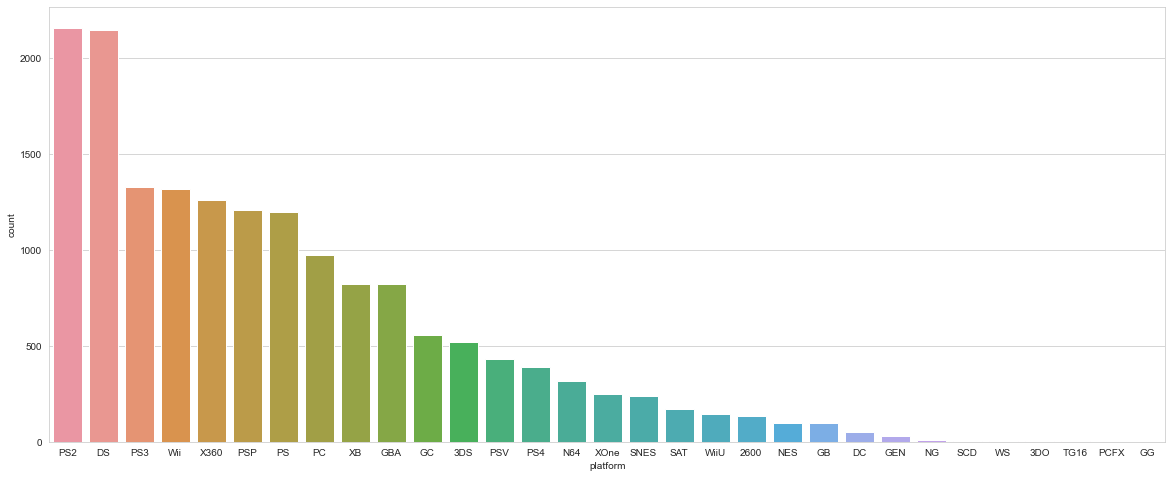

In [195]:
#plot [platform],[rating] and [genre]

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.countplot(x='platform', data=df,order=df.platform.value_counts().index)
